# HashTable
* 個人理解
  * 把資料存進Buckets裡
  * 如果資料的index一樣，接再前一筆資料的後面，形成LinkedList

# 參考資料
  * WIKI : https://zh.wikipedia.org/wiki/%E5%93%88%E5%B8%8C%E8%A1%A8
  * http://alrightchiu.github.io/SecondRound/hash-tableintrojian-jie.html
  * HashSet : https://www.cs.wcupa.edu/rkline/ds/hash-sets.html
  * Youtube影片 : 
    * https://www.youtube.com/watch?v=zHi5v78W1f0
    * https://www.youtube.com/watch?v=9HFbhPscPU0

## Hash Table 與 Hash function 原理

* HashTable是一種資料結構，把訊息或資料壓縮成摘要，使得資料量變小，將資料的格式固定下來，把key值依照hash後得到的index值，放入在各個table中，比如說我今天hash時是%10，那麼key:1006的index就是6，那麼我的table也要有0~9，10個去存放我的資料，假使現在有一個key值為2006，index與剛剛的1006一樣，那麼就把第二個進來的2006接在1006後面，將每個table裡的資料形成linkedlist接下去。HashFunction是將key值轉換成index值，例如現在我有8個table，那我可以把hash設定成取key%8的值為index，這樣經過%8後的值會有0,1,2,3,4,5,6,7，接著編好index後再使用hashset來add、remove、contains。因為此次作業有規定要用MD5去加密，所以在hash時要先將文字轉換成數字，才能去hash值得到index值

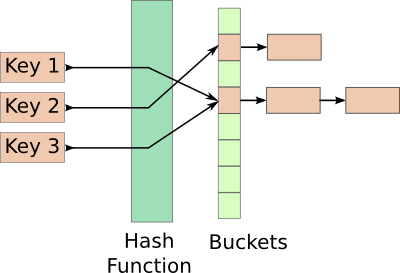

In [6]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename = "D:\三上-資料結構與演算法\HASH.png", width=550, height=500)

上圖 : Key值透過hash function後，裝進Buckets
    
    key1和key3經過hash function放在同一個buckets裡，所以形成linked list~~~

# 流程圖

In [11]:
from IPython.display import Image
from IPython.core.display import HTML

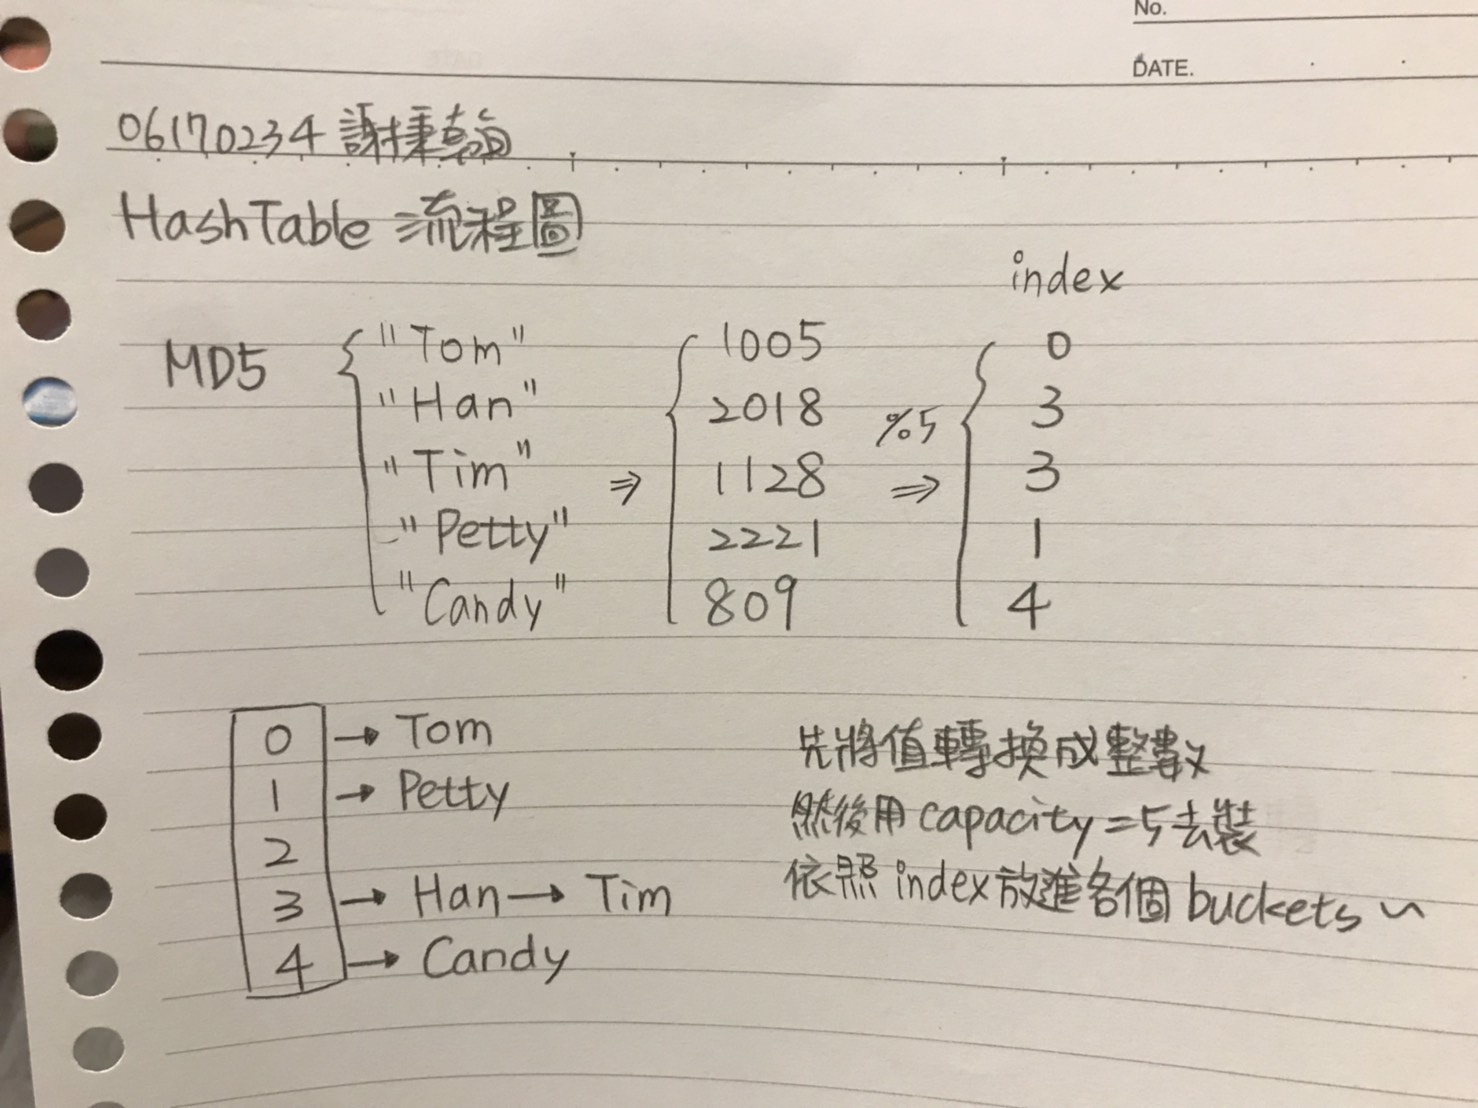

In [12]:
Image(filename = "D:\三上-資料結構與演算法\S__48529410.jpg", width=550, height=500)

# 學習歷程

以下先下載程式範例

In [ ]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """

這次也是一個一個做，先從add開始

後來發現好像不能拆開做，要不然沒辦法驗證有沒有ADD成功

In [3]:
from Crypto.Hash import MD5

In [1]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        if self.data[index] == None:
            self.data[index] = ListNode(key)
        else:
            cur_node = self.data[index]
            head = cur_node
            self.data[index] = ListNode(key)
            cur_node.next = self.data[index]

先講一下寫ADD的概念

一開始先將key用MD5加密，然後/5找出加密後的值所放的index，因為初始值的capacity只有5

if else 的部分 : 如果那一個index還沒有值的話，直接放新的ListNode進去，那如果已經有其他值，就把新進來的node接在原本的next

這邊也還沒有驗證，先繼續完成其他remove跟contains

In [6]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        if self.data[index] == None:
            return
        elif key == self.data[index].val:
            self.data[index] = self.data[index].next
            return

寫remove的概念

一樣先用MD轉換key值，如果index還沒有值，就直接retrun

如果欲刪除之值key為self.data[index].val之值，那麼把原本值接到next完成remove

In [8]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        head = self.data[index]
        if self.data[index] == None:
            return
        else:
            while head is not None:
                if head.val == key:
                    return True
                else:
                    head = head.next
            return False

寫contains的概念

第一個條件式跟前兩個def一樣，再來就是，如果key等於head時，return True，但要查找的key如果不是在head，就往next去找

其餘的return False!!!!!!!!!!!!!!!!!!!!!!!

In [75]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        if self.data[index] == None:
            self.data[index] = ListNode(key)
        else:
            cur_node = self.data[index]
            head = cur_node
            self.data[index] = ListNode(key)
            cur_node.next = self.data[index]
        return
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        if self.data[index] == None:
            return
        elif key == self.data[index].val:
            self.data[index] = self.data[index].next
            return
    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        head = self.data[index]
        if self.data[index] == None:
            return
        else:
            while head is not None:
                if head.val == key:
                    return True
                else:
                    head = head.next
            return False

In [76]:
from Crypto.Hash import MD5

In [77]:
hashSet = MyHashSet()
hashSet.add("dog")
hashSet.add("pig")
rel = hashSet.contains("pig")
print(rel)
rel = hashSet.contains("dog")
print(rel)
rel = hashSet.contains("cat")
print(rel)
hashSet.add("bird")
rel = hashSet.contains("bird")
print(rel)
hashSet.remove("pig")
rel = hashSet.contains("pig")
print(rel)

True
True
False
True
None


最後一個測值錯誤，用Spyder debug後，發現問題在remove的地方，修改一下

In [68]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        if self.data[index] == None:
            self.data[index] = ListNode(key)
        else:
            cur_node = self.data[index]
            head = cur_node
            self.data[index] = ListNode(key)
            cur_node.next = self.data[index]
        return
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        head = self.data[index]
        if not self.contains(key):
            return
        elif key == self.data[index].val:
            self.data[index] = self.data[index].next
            return
        else:
            while head.next:
                if head.next.val == key:
                    head.next = head.next.next
                else:
                    head = head.next
            return
    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        head = self.data[index]
        if self.data[index] == None:
            return
        else:
            while head is not None:
                if head.val == key:
                    return True
                else:
                    head = head.next
            return False

In [69]:
from Crypto.Hash import MD5
hashSet = MyHashSet()
hashSet.add("dog")
hashSet.add("pig")
rel = hashSet.contains("pig")
print(rel)
rel = hashSet.contains("dog")
print(rel)
rel = hashSet.contains("cat")
print(rel)
hashSet.add("bird")
rel = hashSet.contains("bird")
print(rel)
hashSet.remove("pig")
rel = hashSet.contains("pig")
print(rel)

True
True
False
True
None


改完居然還是錯的，一樣用Spyder再看看哪裡出錯

結果是在contains的地方就出了小小的問題

我在contains裡的if self.data[index] == None，return時沒有給False:))

In [70]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        if self.data[index] == None:
            self.data[index] = ListNode(key)
        else:
            cur_node = self.data[index]
            head = cur_node
            self.data[index] = ListNode(key)
            cur_node.next = self.data[index]
        return
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        head = self.data[index]
        if not self.contains(key):
            return
        elif key == self.data[index].val:
            self.data[index] = self.data[index].next
            return
        else:
            while head.next:
                if head.next.val == key:
                    head.next = head.next.next
                else:
                    head = head.next
            return
    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        head = self.data[index]
        if self.data[index] == None:
            return False
        else:
            while head is not None:
                if head.val == key:
                    return True
                else:
                    head = head.next
            return False

In [71]:
from Crypto.Hash import MD5
hashSet = MyHashSet()
hashSet.add("dog")
hashSet.add("pig")
rel = hashSet.contains("pig")
print(rel)
rel = hashSet.contains("dog")
print(rel)
rel = hashSet.contains("cat")
print(rel)
hashSet.add("bird")
rel = hashSet.contains("bird")
print(rel)
hashSet.remove("pig")
rel = hashSet.contains("pig")
print(rel)

True
True
False
True
False


In [91]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        if self.data[index] == None:
            self.data[index] = ListNode(key)
        else:
            cur_node = self.data[index]
            head = cur_node
            self.data[index] = ListNode(key)
            cur_node.next = self.data[index]
        return
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        head = self.data[index]
        if not self.contains(key):
            return
        elif key == self.data[index].val:
            self.data[index] = self.data[index].next
            return
        elif head.next != None:
            while head.next:
                if head.next.val == key:
                    head.next = head.next.next
                else:
                    head = head.next
            return
    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % 5
        head = self.data[index]
        if self.data[index] == None:
            return False
        else:
            while head is not None:
                if head.val == key:
                    return True
                else:
                    head = head.next
            return False

In [92]:
from Crypto.Hash import MD5
hashSet = MyHashSet()
hashSet.add("dog")
hashSet.add("pig")
rel = hashSet.contains("pig")
print(rel)
rel = hashSet.contains("dog")
print(rel)
rel = hashSet.contains("cat")
print(rel)
hashSet.add("bird")
rel = hashSet.contains("bird")
print(rel)
hashSet.remove("pig")
rel = hashSet.contains("pig")
print(rel)

True
True
False
True
False


終於成功利用助教的測值，有達到期望的測試結果

但想要簡化一下我的程式碼，因為在使用add、remove、contains時都有利用到MD5

所以可以用def來套

以下是簡化程式碼後的最終code

In [5]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    
    def ghash(self, key):
        from Crypto.Hash import MD5
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % self.capacity
        return index
    
    def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        index = self.ghash(key)
        if self.data[index] == None:
            self.data[index] = ListNode(key)
        else:
            cur_node = self.data[index]
            head = cur_node
            self.data[index] = ListNode(key)
            cur_node.next = self.data[index]
        return
    
    def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        index = self.ghash(key)
        cur_node = self.data[index]
        if not self.contains(key):
            return
        elif key == self.data[index].val:
            self.data[index] = self.data[index].next
            return
        elif cur_node.next != None:
            while cur_node.next:
                if cur_node.next.val == key:
                    cur_node.next = cur_node.next.next
                else:
                    cur_node = cur_node.next
            return
        
    def contains(self, key):
        """
        :type key: int
        :rtype: bool(True or False)
        """
        index = self.ghash(key)
        cur_node = self.data[index]
        if self.data[index] == None:
            return False
        else:
            while cur_node is not None:
                if cur_node.val == key:
                    return True
                else:
                    cur_node = cur_node.next
            return False

原本我用MD5找index時是用%5去找，但是這樣不對，要依照capacity的容量去衡量

In [6]:
hashSet = MyHashSet()
hashSet.add("dog")
hashSet.add("pig")
rel = hashSet.contains("pig")
print(rel)
rel = hashSet.contains("dog")
print(rel)
rel = hashSet.contains("cat")
print(rel)
hashSet.add("bird")
rel = hashSet.contains("bird")
print(rel)
hashSet.remove("pig")
rel = hashSet.contains("pig")
print(rel)

True
True
False
True
False


In [3]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
    
    def ghash(self, key):
        from Crypto.Hash import MD5
        h = MD5.new()
        h.update(key.encode("utf-8"))
        x = h.hexdigest()
        x = int(h.hexdigest(), 16)
        index = x % self.capacity
        return index
    
    def add(self, key):
        index = self.ghash(key)
        if self.data[index] == None:
            self.data[index] = ListNode(key)
            return
        if self.data[index] == key:
            return
        else:
            cur_node = self.data[index]
            while cur_node != None:
                if cur_node == key:
                    return
                if cur_node.next == None:
                    cur_node.next = ListNode(key)
                    return
                if cur_node.next != None:
                    cur_node = cur_node.next
            return
    
    def remove(self, key):
        index = self.ghash(key)
        cur_node = self.data[index]
        if not self.contains(key):
            return
        elif key == self.data[index].val:
            self.data[index] = self.data[index].next
            return
        elif cur_node.next != None:
            while cur_node.next:
                if cur_node.next.val == key:
                    cur_node.next = cur_node.next.next
                else:
                    cur_node = cur_node.next
            return
        
    def contains(self, key):
        index = self.ghash(key)
        cur_node = self.data[index]
        try:
            if cur_node.val == None:
                return False
            elif cur_node.val != key:
                cur_node = cur_node.next
        except:
            pass
        else:
            pass
        finally:
            pass
        
        if not cur_node:
            return False
        if cur_node.val is key:
            return True

In [4]:
hashSet = MyHashSet()
hashSet.add("dog")
hashSet.add("pig")
rel = hashSet.contains("pig")
print(rel)
rel = hashSet.contains("dog")
print(rel)
rel = hashSet.contains("cat")
print(rel)
hashSet.add("bird")
rel = hashSet.contains("bird")
print(rel)
hashSet.remove("pig")
rel = hashSet.contains("pig")
print(rel)

True
True
False
True
False
